# Comparison of the performances of classification models

Build kNN and logistic regression classifiers using sklearn library to predict "satisfaction" (**label** variable) by using given data. 
- First, shuffle and split your data into train, validation and test sets randomly, with a ratio of 70:10:20 **(10 points)**. 
- Build your models (with proper comments and explanations) using training set, and do parameter selection over the validation set  **(45 points)**. 
- Compare these 2 classification models according to their accuracies (you can print accuracy values in a single table as a comprehensive view) over the test set. Comment on their classification performance **(10 points)**.
- Plot confusion matrices for your models over the test set, and comment on the outcomes **(15 points)**. 
- Finally, plot Precision-Recall (PR) curves for each classification model over the test set and evaluate the prediction performance of each classifier **(20 points)**. 

Notes:

* Choose the optimal k value using Minkowski distance (with trying two different p-values) for kNN model using the validation set. 


* For any parameter selection, use the validation set.


* Don't forget to add comments into your code lines to explain how your program works, your intentions behind it. Also, do not forget to comment on the outcomes and comparisons. 

### PART 1 : SHUFFLING AND SPLITTING DATA

In [1063]:
# importing necessary modules
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as Knn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [1064]:
# reading csv data and replacing data with integer values
data_df = pd.read_csv('data.csv')
data_df['Gender'].replace(['Male', 'Female'],
                        [0, 1], inplace=True)
data_df['Customer Type'].replace(['Loyal Customer', 'disloyal Customer'],
                        [0, 1], inplace=True)
data_df['Type of Travel'].replace(['Personal Travel', 'Business travel'],
                        [0, 1], inplace=True)
data_df['Class'].replace(['Eco', 'Business','Eco Plus'],
                        [0,1,2], inplace=True)
data_df['satisfaction'].replace(['dissatisfied', 'satisfied'],
                        [0,1], inplace=True)
data_df.dropna(subset=['Arrival Delay in Minutes'],inplace=True)

# splitting data to x and y
X = data_df.loc[:,data_df.columns != 'satisfaction']
y = data_df.loc[:,['satisfaction']]

sqrt_number_of_samples = round(len(X)**0.5) # go to elbow function for this attribute

X = np.array(X)
y = np.array(y)

# shuffling and spliting data into train, validation and test sets randomly
X_train, X_test, y_train, y_test = train_test_split(X, y.reshape(-1,), test_size=0.2, random_state=1, shuffle=True)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1/0.8, random_state=1, shuffle=True)

scaler = MinMaxScaler()
# scaling data. fit_transform should be done separately for each x data.
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.fit_transform(X_test)
scaled_x_valid = scaler.fit_transform(X_valid)

#### UTIL FUNCTIONS

In [1065]:
def display_confusion_matrix(inp_confusion_matrix):
    # heatmap display for confusion matrix
    labels = ["True Neg","False Pos","False Neg","True Pos"] # renaming table grids
    length = len(max(labels))+4
    labels = np.asarray(labels).reshape(2,2)
    annots = [f"{str(label)}({str(value)})" for array in np.dstack((labels,inp_confusion_matrix)) for (label, value) in array]
    annots = np.asarray(annots).reshape(2,2).astype(str)
    plt.figure(figsize = (10,7))
    sns.heatmap(inp_confusion_matrix, annot=annots, cmap="YlGnBu", fmt=f".{length}")
    plt.show()

In [1066]:
# building kNN classifier using training set, and do parameter selection over the validation set
def elbow(train_x, train_y,val_x, val_y):
    # initiating empty list
    val_error = []

    # training model for every value of K
    keys = ["euclidean","manhattan"] # choosing optimal one from Minkowski distance
    for key in keys:
        for i in range(1,sqrt_number_of_samples):   # the optimal K value usually found is the square root of N, N = total number of samples
            # Instance of KNN
            clf = Knn(n_neighbors=(2*i)-1,metric=key)
            clf.fit(train_x, train_y)

            # appending F1 scores to empty list calculated using the predictions
            tmp = clf.predict(val_x)
            tmp_score = accuracy_score(tmp, val_y)
            error = 1 - tmp_score
            val_error.append(error)

            # k value should be odd number for majority voting
            # find the appropriate k value in the index with the highest f1 score (formula : 2*(indexOfMax)+1)
    return (2*(val_error.index(max(val_error))+1))-1 if val_error.index(max(val_error)) < sqrt_number_of_samples else (2*(val_error.index(max(val_error))-25))-1
    # returns the optimal K value for knn classifier

### PART 2 : BUILDING MODELS

In [1067]:
# choosing optimal k value for knn model
optimal_k = elbow(scaled_x_train,y_train,scaled_x_valid,y_valid)
print(f"Choosen optimal k value: {optimal_k}")

# building knn model
knn = Knn(n_neighbors=optimal_k)
knn.fit(scaled_x_train, y_train)
knn_pred = knn.predict(scaled_x_test)

Choosen optimal k value: 69


In [1068]:
# building logistic regression model
lr = LogisticRegression(random_state=1)
lr.fit(scaled_x_train, y_train)
lr_pred = lr.predict(scaled_x_test)

### PART 3 : COMPARING CLASSIFICATION MODELS


In [1069]:
data = {'Model': ["Accuracy of KNN classification","Accuracy of Logistic Regression"], 'Accuracy': [accuracy_score(y_test, knn_pred)*100,accuracy_score(y_test, lr_pred)*100]}
df = pd.DataFrame(data)
df

,Model,Accuracy
0,Accuracy of KNN classification,96.820809
1,Accuracy of Logistic Regression,99.132948


As we can see in the table, the model we use Logistic Regression has slightly better predictive power according to accuracy metric. But of course, it is not enough to say Logistic Regression is better. We should check the other accuracy metrics such as precision-recall values and P-R curves.

### PART 4 : PLOTTING CONFUSION MATRIX


Confusion matrix for KNN classification:


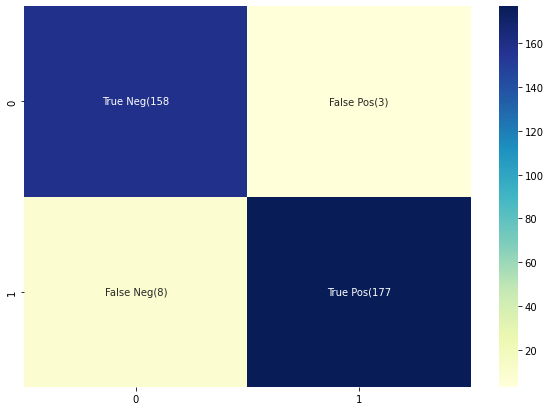

Precision: 0.9833333333333333, Recall: 0.9567567567567568, F1: 0.96986301369863
Accuracy: 96.82080924855492%


In [1070]:
# calculating accuracy metrics
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)
# plotting confusion matrix
_confusion_matrix = confusion_matrix(y_test, knn_pred)
print("Confusion matrix for KNN classification:")
display_confusion_matrix(_confusion_matrix)
print(f"Precision: {knn_precision}, Recall: {knn_recall}, F1: {knn_f1}")
print(f"Accuracy: {accuracy_score(y_test, knn_pred)*100}%")

These precision-recall and f1 values are pretty good for knn. Since False-Pos and False-Neg values are quite low, our precision and recall values are reasonable.

Precision = TP / (TP + FP)
Recall = TP / ( TP + FN)

Confusion matrix for Logistic Regression:


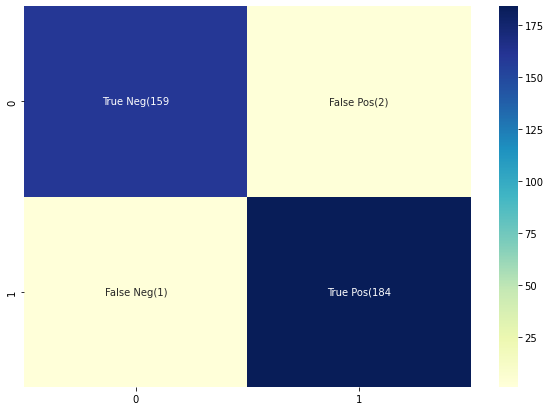

Precision: 0.989247311827957, Recall: 0.9945945945945946, F1: 0.9919137466307278
Accuracy: 99.13294797687861%


In [1071]:
# calculating accuracy metrics
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)
# plotting confusion matrix
_confusion_matrix = confusion_matrix(y_test, lr_pred)
print("Confusion matrix for Logistic Regression:")
display_confusion_matrix(_confusion_matrix)
print(f"Precision: {lr_precision}, Recall: {lr_recall}, F1: {lr_f1}")
print(f"Accuracy: {accuracy_score(y_test, lr_pred)*100}%")

These precision recall and f1 values are perfect for logistic regression. Since False-Pos value is 0 and False-Neg value are quite low, our precision and recall values are good.

Precision = TP / (TP + FP)
    -> FP = 0
    -> TP/TP = Precision = 1

Recall = TP / ( TP + FN)

### PART 5 : PLOTTING PRECISION-RECALLL CURVES

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

Higher precision means that an algorithm returns more relevant results than irrelevant ones, and high recall means that an algorithm returns most of the relevant results (whether or not irrelevant ones are also returned).

Text(0.5, 1.0, 'Precision-Recall curve')

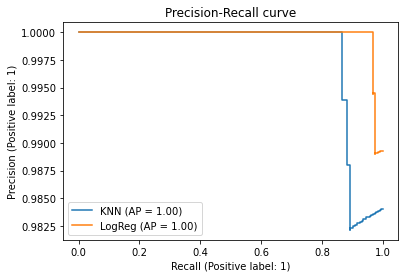

In [1072]:
from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(knn, scaled_x_test, y_test, ax = plt.gca(),name = "KNN")

plot_precision_recall_curve(lr, scaled_x_test, y_test, ax = plt.gca(),name = "LogReg")

plt.title('Precision-Recall curve')

Our Precision-Recall curves are like this. As you can see, the tradeoff between precision and recall is more reasonable in the Logistic Regression curve. However, there is a sharp decrease for the knn model, which is not as much as the logistic regression. The ideal state of the model is where this curve snaps to the top of the graph as a straight line. In this case, there is no tradeoff between precision and recall, and the recall value is unimportant. The closest to this is provided by Logistic Regression. At the same time, this situation can be observed in the values of accuracy metrics (f1 score, accuracy score). Our Average Precision (AP) values are the same as a result of rounding.

##### As a result, the Logistic Regression model should be preferred for this dataset.